# **Task 6: House Price Prediction**
Training two different models (Linear Regression and  Gradient Boosting Regression) on a Housing Prices Dataset.

In [1]:
# Importing Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
path

Using Colab cache for faster access to the 'housing-prices-dataset' dataset.


'/kaggle/input/housing-prices-dataset'

In [4]:
# load dataset
df = pd.read_csv(f'{path}/Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# check for null values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.shape

(545, 13)

### **Preprocessing**

In [7]:
# Label Encoding on categoriacal columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

### **Prepaire two varients of the dataset for different models:**



*   For the Linear Regression Model, the entire dataset has been scaled.
*   For the Gradient Boosting Model, only the high-ranged numerical column has been scaled.



In [8]:
# Make two copies of the dataset
lr_df = df.copy()
gbr_df  = df.copy()

In [9]:
# Standard Scaling for Linear Regression
scale_cols = lr_df.select_dtypes(include='number').columns

lr_df_scaler = StandardScaler()

lr_df[scale_cols] = lr_df_scaler.fit_transform(lr_df[scale_cols])

In [10]:
# Standard Scaling for Linear Regression
gbr_df_scaler = StandardScaler()
gbr_df[['price', 'area']] = gbr_df_scaler.fit_transform(gbr_df[['price', 'area']])

## **Training Linear Regression Model**

In [11]:
# Separate the target feature from the rest of the dataset
lr_X = lr_df.drop('price', axis=1)
lr_y = lr_df['price']

In [12]:
# Split dataset into training and testing part
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=0.2, random_state=42)

In [15]:
# Training the model
model = LinearRegression()
model.fit(lr_X_train, lr_y_train)

LinearRegression()

In [16]:
# making the predicitons on the test dataset
y_pred = model.predict(lr_X_test)

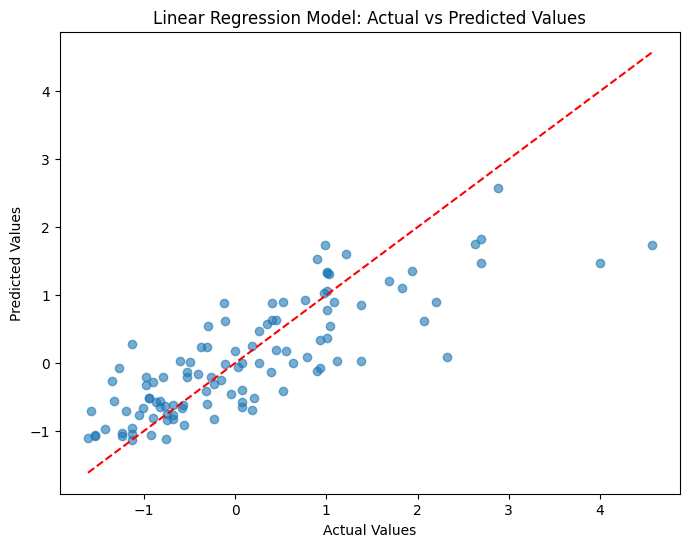

In [17]:
# ploting the scatter plot for visuallizing the actual vs predicted values
# The red-dotted line showing our best-fit line (mainly our linear regression model).
plt.figure(figsize=(8, 6))
plt.scatter(lr_y_test, y_pred, alpha=0.6)
plt.plot([min(lr_y_test), max(lr_y_test)], [min(lr_y_test), max(lr_y_test)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Model: Actual vs Predicted Values")
plt.show()

In [27]:
# Evaluating the model performance
mae = mean_absolute_error(lr_y_test, y_pred)
mse = mean_squared_error(lr_y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE) of Linear Regression:", mae)
print("Root Mean Squared Error (RMSE) of Linear Regression:", rmse)

Mean Absolute Error (MAE) of Linear Regression: 0.5242509357450866
Root Mean Squared Error (RMSE) of Linear Regression: 0.7122893757982467


## **Training  Gradient Boosting Regression**

In [19]:
# Separate the targeted feature (price) from the rest of the dataset
gbr_X = gbr_df.drop('price', axis=1)
gbr_y = gbr_df['price']

In [20]:
# Spliting the dataset into train and test part
gbr_X_train, gbr_X_test, gbr_y_train, gbr_y_test = train_test_split(gbr_X, gbr_y, test_size=0.2, random_state=42)

In [21]:
# Prepairing the Gradoemt Boosting Regression Model
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [22]:
# Train the model
gbr.fit(gbr_X_train, gbr_y_train)

GradientBoostingRegressor(random_state=42)

In [23]:
# Making predictions
gbr_y_pred = gbr.predict(gbr_X_test)

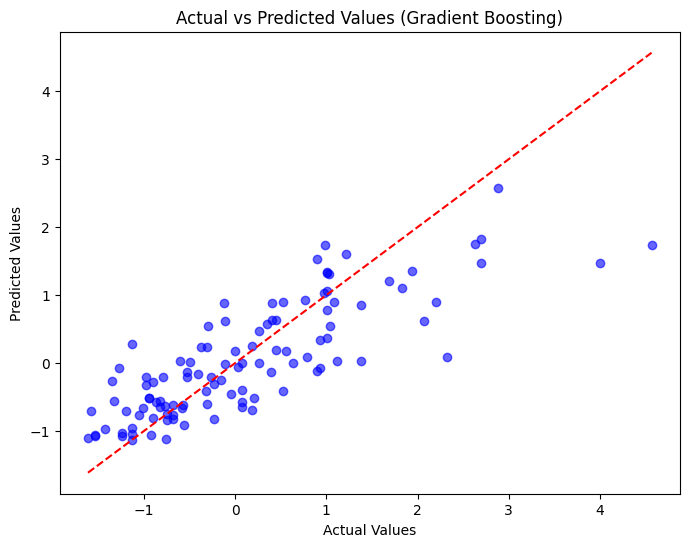

In [24]:
# visuallizing the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(gbr_y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(gbr_y_test), max(gbr_y_test)],
         [min(gbr_y_test), max(gbr_y_test)],
         color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.show()

In [26]:
# Evaluate the model
mae = mean_absolute_error(gbr_y_test, gbr_y_pred)
rmse = np.sqrt(mean_squared_error(gbr_y_test, gbr_y_pred))

print("MAE of Gradient Boosting Regression:", mae)
print("RMSE of Gradient Boosting Regression:", rmse)

MAE of Gradient Boosting Regression: 0.5158918479154608
RMSE of Gradient Boosting Regression: 0.6966639739575606


Comparing the evaluation metrics, the Gradient Boosting Regression model has a lower Mean Absolute Error (MAE) of 0.51589 and a lower Root Mean Squared Error (RMSE) of 0.69666 compared to the Linear Regression model's MAE of 0.52425 and RMSE of 0.71229. Therefore, the Gradient Boosting Regression model fits the dataset better.